In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import numpy as np

Three memory patterns

In [ ]:
x1=np.array([-1,-1,1,-1,1,-1,-1,1],dtype=float)
x2=np.array([-1,-1,-1,-1,-1,1,-1,-1],dtype=float)
x3=np.array([-1,1,1,-1,-1,1,-1,1],dtype=float)

In [ ]:
patterns=np.array([x1,x2,x3])

In [ ]:
#Creation of the weight matrix

def weight_matrix(patterns,scaling):
  n=len(patterns[0])
  P=len(patterns)
  W=np.zeros((n,n))
  for i in range (n):
    for j in range(n):
     #if j==i:
        #W[i,j]=0
        #continue
      somme=0
      for mu in range(P):
        x_mu=patterns[mu]
        somme = somme + x_mu[i]*x_mu[j]
      W[i,j]=somme
      if scaling==True:
        W[i,j]=W[i,j]/n # if scale is True, we scale with the number of units
  return W

In [ ]:
W1=weight_matrix(patterns,scaling=True)
W2=weight_matrix(patterns,scaling=False)

Update rule

In [ ]:
def sign(x):
  if x>=0:
    return 1
  else:
    return -1

In [ ]:
#this function updates just a single vector one time in batch mode - Use this function Hopfield Little Model
def one_update_rule_batch1(x,W):
  new = np.dot(W,x)
  new[new>=0]=1
  new[new<0]=-1
  return new

In [ ]:
#this function updates just a single vector one time in batch mode - Use this function Hopfield Little Model
def one_update_rule_batch(x,W):
  new = np.dot(W,x)
  for i in range(len(new)):
    new[i]=sign(new[i])
  return new

In [ ]:
#this function sequentially updates just a single vector one time

def one_update_rule_sequential(x,W):
        dimension = x.shape[0]
        new = np.copy(x)
        for i in range(dimension):
            sum_ = 0
            for j in range(dimension):
                sum_ += np.multiply(W[i][j], new[j])
            if sum_ < 0:
                new[i] = -1
            else:
                new[i] = 1
        return new

In [ ]:
def one_update_rule_random(x,W):
  N=len(x)
  new_x=np.copy(x)
  for count in range(N):
    i = np.random.randint(0,N)
    quantity = W[i,:].dot(x)
    new_x[i]=sign(quantity)
  return new_x

In [ ]:
#this function updates just a single vector until convergence and returns the new vector as well as the number of iterations before convergence

def update_rule(x,W,update,display=False):
  list_x=[]
  max_iter=50
  energy_list=[]
  iterations=0
  condition=True
  x_before=np.copy(x)
  while(condition):
    if iterations%10==0 and iterations!=0:
      print("Iteration: ",iterations)
    if iterations == max_iter:
      break
    #print(np.count_nonzero(np.array(x_before)-np.array(x_after)))
    if update=="batch":
      x_after=one_update_rule_batch(x_before,W)
    elif update=="sequential":
      x_after=one_update_rule_sequential(x_before,W)
    elif update=="random":
      x_after=one_update_rule_random(x_before,W)
      if display==True:
        display_pattern(x_after)
    if x_after.tolist() in list_x and not np.all(x_after==x_before):
      print("oscillations")
    list_x.append(x_after.tolist())
    iterations+=1
    energy_list.append(energy(x_after,W))
    condition=not np.all(x_after==x_before)
    x_before=np.copy(x_after)
    #print(energy(x_after,W))
  return x_after,iterations,energy_list,list_x

In [ ]:
for x in patterns:
  print("Old pattern was ",x," updated pattern is ",update_rule(x,W2,"batch")[0])
  if (np.array_equal(x,update_rule(x,W2,"batch")[0])):
    print("They're the same")

Old pattern was  [-1. -1.  1. -1.  1. -1. -1.  1.]  updated pattern is  [-1. -1.  1. -1.  1. -1. -1.  1.]
They're the same
Old pattern was  [-1. -1. -1. -1. -1.  1. -1. -1.]  updated pattern is  [-1. -1. -1. -1. -1.  1. -1. -1.]
They're the same
Old pattern was  [-1.  1.  1. -1. -1.  1. -1.  1.]  updated pattern is  [-1.  1.  1. -1. -1.  1. -1.  1.]
They're the same


The network is able to store all three patterns

# 3 Tasks and questions 

## 3.1 Convergence and attractors

### Update rule on three distorded input patterns

In [ ]:
x1d=np.array([1,-1,1,-1,1,-1,-1,1])
x2d=np.array([1,1,-1,-1,-1,1,-1,-1])
x3d=np.array([1,1,1,-1,1,1,-1,1])

In [ ]:
patterns_distorded=np.array([x1d,x2d,x3d])

In [ ]:
#this function updates each pattern of a set of patterns and returns the array of updated patterns as well as the number of iterations before convergence for each pattern

def update_patterns(patterns,W,update):
  list_iterations=[]
  new_patterns=[]
  for mu in range(len(patterns)):
    pattern=patterns[mu]
    new_pattern,iteration,energy_list,list_x=update_rule(pattern,W,update)
    new_patterns.append(new_pattern)
    list_iterations.append(iteration)
  return np.array(new_patterns),list_iterations

In [ ]:
new_patterns,list_iterations=update_patterns(patterns_distorded,W2,"batch")

In [ ]:
for i in range(len(new_patterns)):
  x=new_patterns[i]
  print("The new patterns is ",x," and the correct pattern was ",patterns[i]," The convergence takes ",list_iterations[i]," iterations")
  if (np.array_equal(x,patterns[i])):
    print("They're the same")

The new patterns is  [-1. -1.  1. -1.  1. -1. -1.  1.]  and the correct pattern was  [-1. -1.  1. -1.  1. -1. -1.  1.]  The convergence takes  2  iterations
They're the same
The new patterns is  [-1.  1. -1. -1. -1.  1. -1. -1.]  and the correct pattern was  [-1. -1. -1. -1. -1.  1. -1. -1.]  The convergence takes  2  iterations
The new patterns is  [-1.  1.  1. -1. -1.  1. -1.  1.]  and the correct pattern was  [-1.  1.  1. -1. -1.  1. -1.  1.]  The convergence takes  3  iterations
They're the same


x1d and x3d converge towards stored patterns.
After 3 iterations, x2d does not converge toward x2

### How many attractors are there in the network ?

In [ ]:
# Creation of the set of all combinations of patterns

all_patterns = [list(i) for i in itertools.product([-1, 1], repeat=8)]

In [ ]:
# For each combination, find the fixed point
fixed_points,list_iterations=update_patterns(all_patterns,W2,"sequential")

In [ ]:
# Return the list of uniques fixed points, hence the number of attractors
attractors= np.unique(fixed_points, axis=0)
occurences=np.zeros(len(attractors))
index=0
for attractor in attractors:
  for i in range(len(fixed_points)):
    if np.array_equal(attractor,fixed_points[i]):
      occurences[index]+=1
  index+=1
print("The number of attractors in this network is ",len(attractors))

The number of attractors in this network is  14


In [ ]:
attractors

array([[-1, -1, -1, -1, -1,  1, -1, -1],
       [-1, -1, -1, -1,  1, -1, -1, -1],
       [-1, -1,  1, -1, -1,  1, -1,  1],
       [-1, -1,  1, -1,  1, -1, -1,  1],
       [-1, -1,  1, -1,  1,  1, -1,  1],
       [-1,  1, -1, -1, -1,  1, -1, -1],
       [-1,  1,  1, -1, -1,  1, -1,  1],
       [-1,  1,  1, -1,  1, -1, -1,  1],
       [ 1, -1, -1,  1,  1, -1,  1, -1],
       [ 1,  1, -1,  1, -1,  1,  1, -1],
       [ 1,  1, -1,  1,  1, -1,  1, -1],
       [ 1,  1, -1,  1,  1,  1,  1, -1],
       [ 1,  1,  1,  1, -1,  1,  1,  1],
       [ 1,  1,  1,  1,  1, -1,  1,  1]])

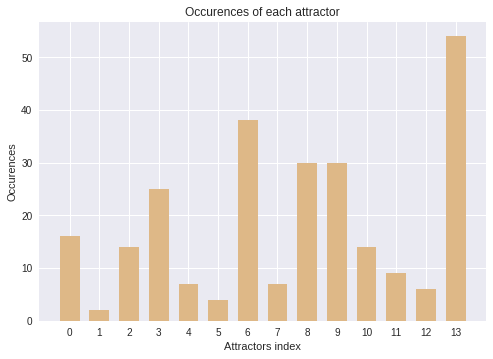

In [ ]:
plt.xticks(np.arange(len(attractors)))
width = 1/1.5
plt.bar(range(len(attractors)), occurences, width, color="burlywood")
plt.xlabel("Attractors index")
plt.ylabel("Occurences")
plt.title("Occurences of each attractor")
plt.show()

### Behavior for more dissimilar starting patterns

In [ ]:
# These three input patterns have 5 bit errors, compared with x1,x2 and x3

x1_very_dissimilar=np.array([1,1,-1,1,-1,-1,-1,1])
x2_very_dissimilar=np.array([1,1,1,1,1,1,-1,-1])
x3_very_dissimilar=np.array([1,-1,-1,1,1,1,-1,1])

In [ ]:
patterns_very_dissimilar=np.array([x1_very_dissimilar,x2_very_dissimilar,x3_very_dissimilar])

In [ ]:
new_patterns,list_iterations=update_patterns(patterns_very_dissimilar,W2,"batch")

In [ ]:
for i in range(len(new_patterns)):
  x=new_patterns[i]
  print("The new patterns is ",x," and the correct pattern was ",patterns[i]," The convergence takes ",list_iterations[i]," iterations")
  if (np.array_equal(x,patterns[i])):
    print("They're the same")
  else:
    print("They are different")

The new patterns is  [ 1.  1.  1.  1.  1. -1.  1.  1.]  and the correct pattern was  [-1. -1.  1. -1.  1. -1. -1.  1.]  The convergence takes  3  iterations
They are different
The new patterns is  [ 1.  1.  1.  1.  1. -1.  1.  1.]  and the correct pattern was  [-1. -1. -1. -1. -1.  1. -1. -1.]  The convergence takes  3  iterations
They are different
The new patterns is  [ 1. -1. -1.  1.  1. -1.  1. -1.]  and the correct pattern was  [-1.  1.  1. -1. -1.  1. -1.  1.]  The convergence takes  2  iterations
They are different


It seems that if the input patterns are very dissimilar, the memory cannot recall the stored patterns

## 3.2 Sequential Update

In [ ]:
pict=np.genfromtxt('/content/pict.dat', dtype = None, delimiter = ',',encoding=None)

In [ ]:
# this function separate all the data in 11 patterns of size 1024

def separation(data):
  patterns=[]
  L=[]
  for i in range(len(data)):
    if i%1024==0 and i!=0:
      patterns.append(np.array(L))
      L=[]
    L.append(data[i])
  patterns.append(np.array(L))
  return patterns

In [ ]:
patterns=separation(pict)

In [ ]:
p1=patterns[0]
p2=patterns[1]
p3=patterns[2]
p4=patterns[3]
p5=patterns[4]
p6=patterns[5]
p7=patterns[6]
p8=patterns[7]
p9=patterns[8]
p10=patterns[9]
p11=patterns[10]

In [ ]:
# this function displays each pattern as a 32x32 image

def display_pattern(pattern):
  pattern=pattern.reshape(32,32)
  plt.imshow(pattern, interpolation='nearest')
  if np.array_equal(pattern,p10.reshape(32,32)) or np.array_equal(pattern,p11.reshape(32,32)):
    plt.title("Degraded pattern")
  else:
    plt.title("Pattern")
  plt.show()

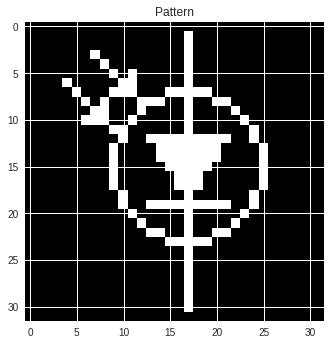

In [ ]:
display_pattern(p3)

#### Learning of the first three patterns

In [ ]:
training_patterns=np.array([p1,p2,p3])

In [ ]:
W=weight_matrix(training_patterns,scaling=True)

### Check that the three patterns are stable

In [ ]:
for x in training_patterns:
  print("Old pattern was ",x," updated pattern is ",update_rule(x,W,"batch")[0]," and the convergence takes ",update_rule(x,W,"batch")[1]," iterations")
  if (np.array_equal(x,update_rule(x,W,"batch")[0])):
    print("They're the same")

Old pattern was  [-1 -1 -1 ... -1 -1 -1]  updated pattern is  [-1. -1. -1. ... -1. -1. -1.]  and the convergence takes  1  iterations
They're the same
Old pattern was  [-1 -1 -1 ... -1 -1 -1]  updated pattern is  [-1. -1. -1. ... -1. -1. -1.]  and the convergence takes  1  iterations
They're the same
Old pattern was  [1 1 1 ... 1 1 1]  updated pattern is  [1. 1. 1. ... 1. 1. 1.]  and the convergence takes  1  iterations
They're the same


The three patterns are stable

### Can the network complete a degraded pattern? 

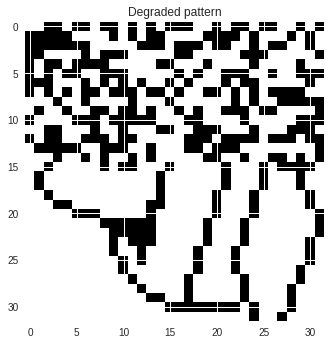

In [ ]:
display_pattern(p10)

The convergence takes  2  iterations


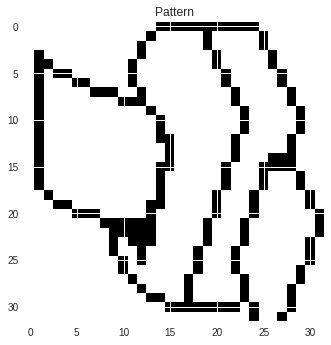

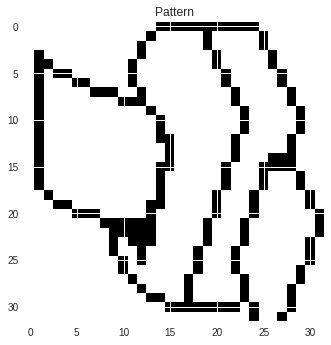

They're the same


In [ ]:
new_p10,iterations,energy_list,list_x=update_rule(p10,W,"batch")
print("The convergence takes ",iterations," iterations")
display_pattern(p1)
display_pattern(new_p10)
if (np.array_equal(p1,new_p10)):
    print("They're the same")

The network can complete a degraded pattern

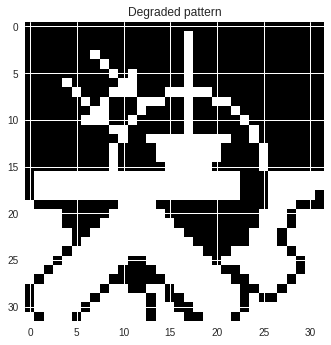

In [ ]:
display_pattern(p11)

The convergence takes  3  iterations


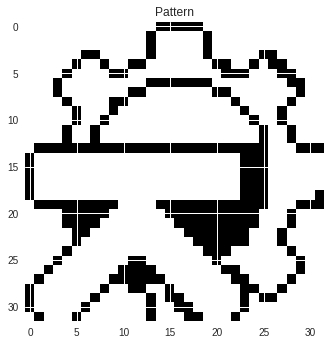

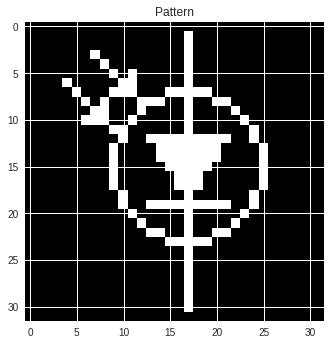

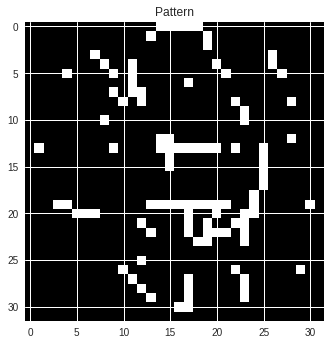

In [ ]:
new_p11,iterations,energy_list,list_x=update_rule(p11,W,"batch")
print("The convergence takes ",iterations," iterations")
display_pattern(p2)
display_pattern(p3)
display_pattern(new_p11)

So the network cannot complete a pattern that is a mixture of two learnt patterns in batch mode

### Sequential update with random units

The convergence takes  3  iterations


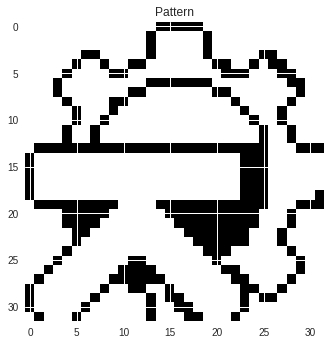

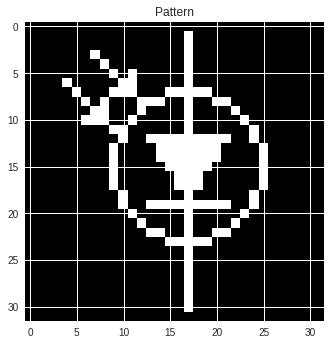

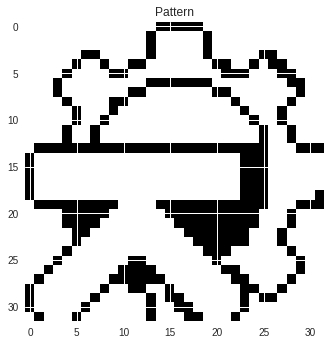

In [ ]:
new_p11,iterations,energy_list,list_x=update_rule(p11,W,"sequential")
print("The convergence takes ",iterations," iterations")
display_pattern(p2)
display_pattern(p3)
display_pattern(new_p11)

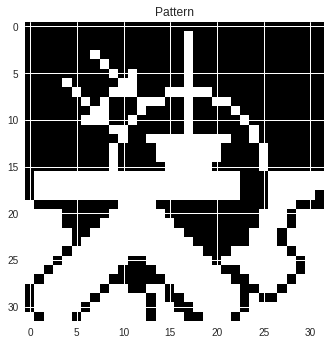

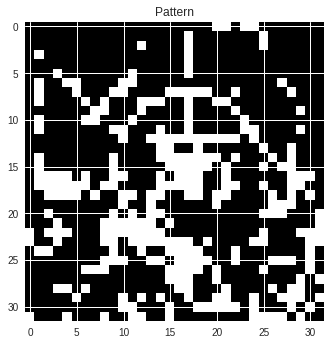

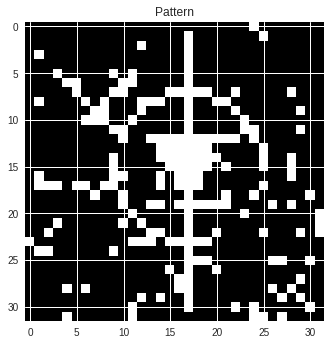

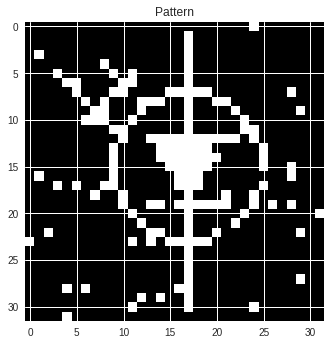

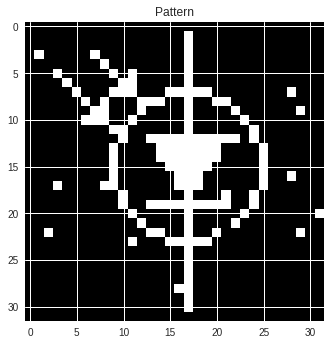

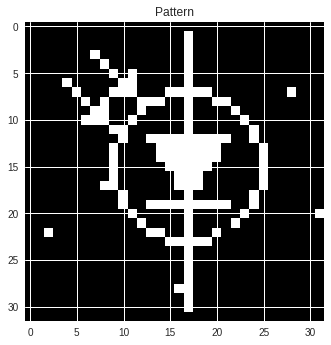

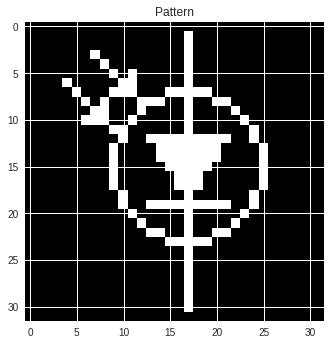

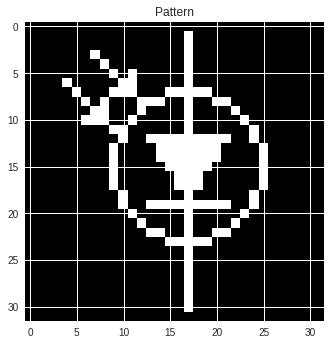

The convergence takes  7  iterations
This is the recalled pattern


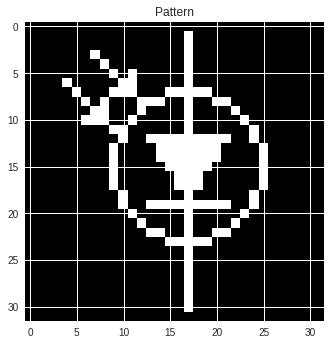

In [ ]:
display_pattern(p11)
new_p11,iterations,energy_list,list_x=update_rule(p11,W,"random",display=True)
print("The convergence takes ",iterations," iterations")
print("This is the recalled pattern")
display_pattern(new_p11)

With a sequential update, the pattern converges most of the time to the pattern p3 in a few iterations
The number of iterations needed for convergence is not constant